In [2]:
import matplotlib.pyplot as plt
import matplotlib
import glob
import math

In [3]:
domains = ["blocks", "driverlog", "miconic", "satellite"]

In [4]:
def parse_data(domain):
    result_files = glob.glob('benchmarks/{}/f1_ration_*'.format(domain))

    pos_demonstrations = []
    total_demonstrations = []
    f1_sound = []
    f1_complete = dict()
    f1_FAMA = []

    with open(result_files[0], "r") as f:
            for line in f.readlines():
                parsed_line = list(map(str.strip,line.strip().split(",")))
                pos_demonstrations += [int(parsed_line[0])]
                total_demonstrations += [int(parsed_line[1])]
                f1_sound += [float(parsed_line[2])]

    for result_file in result_files:
        with open(result_file, "r") as f:
            ration = int(result_file.split("_")[2])
            f1_complete[ration] = []
            for line in f.readlines():
                parsed_line = list(map(str.strip,line.strip().split(",")))
                # pos_demonstrations += [int(parsed_line[0])]
                # total_demonstrations += [int(parsed_line[1])]
                # f1_sound += [float(parsed_line[2])]
                f1_complete[ration] += [float(parsed_line[3])]

    with open("benchmarks/{}/f1_FAMA_results.csv".format(domain), "r") as f:
         for line in f.readlines():
              parsed_line = line.strip()
              if math.isnan(float(parsed_line)):
                f1_FAMA += [0.0]
              else:
                f1_FAMA += [float(parsed_line)]
    
    return pos_demonstrations, total_demonstrations, f1_sound, f1_complete, f1_FAMA

In [9]:
def parse_sample_analysis_data(domain):

    plans = []
    original_demonstrations = []
    extended_demonstrations = []

    with open("benchmarks/{}/sample_analysis.csv".format(domain), "r") as f:
            for line in f.readlines():
                parsed_line = list(map(str.strip,line.strip().split(",")))
                plans += [int(parsed_line[0])]
                original_demonstrations += [int(parsed_line[1])]
                extended_demonstrations += [int(parsed_line[2])]
    
    return plans, original_demonstrations, extended_demonstrations

# F1-Score Figure

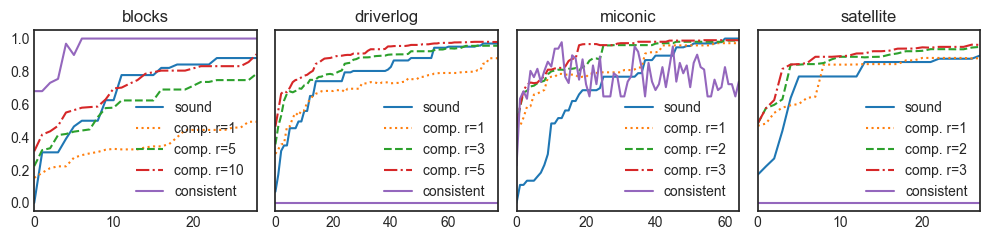

In [7]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 10

fig, axs = plt.subplots(1,4, figsize=(10,2.5))
plt.style.use("seaborn-v0_8-white")


# color1 = plt.cm.viridis(0)
# color2 = plt.cm.viridis(0.4)
# color3 = plt.cm.viridis(.8)

alpha_v = 1

selection = {
    "blocks": [1,5,10],
    "driverlog": [1,3,5],
    "miconic": [1,2,3],
    "satellite": [1,2,3]
}

styles = ["dotted", "dashed", "dashdot"]

axs[0].set_ylim(-0.05,1.05)
# axs[0].yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
for i in range(len(domains)):
    domain = domains[i]
    pos_demonstrations, total_demonstrations, f1_sound, f1_complete, f1_FAMA = parse_data(domain)

    axs[i].set_title(domain)
    # axs[i].xaxis.set_ticks([1, 10, 100, 1000])
    axs[i].set_xlim(0,pos_demonstrations[-1])
    axs[i].set_ylim(-0.05,1.05)
    # axs[i].set_ylim(-0.1,1.1)
    if i > 0:
        axs[i].yaxis.set_ticks([])
    
    axs[i].plot(pos_demonstrations, f1_sound, alpha=alpha_v, label="sound")
    for j in range(len(selection[domain])):
        ration = selection[domain][j]
        line_style = styles[j]
        axs[i].plot(pos_demonstrations, f1_complete[ration], alpha=alpha_v, linestyle=line_style, label="comp. r={}".format(ration))
    axs[i].plot(pos_demonstrations, f1_FAMA, alpha=alpha_v, label="consistent")
    axs[i].legend(loc="lower right")

fig.tight_layout()
plt.savefig("f1score.pdf",bbox_inches='tight')


# Benchmarks Analysis Figure

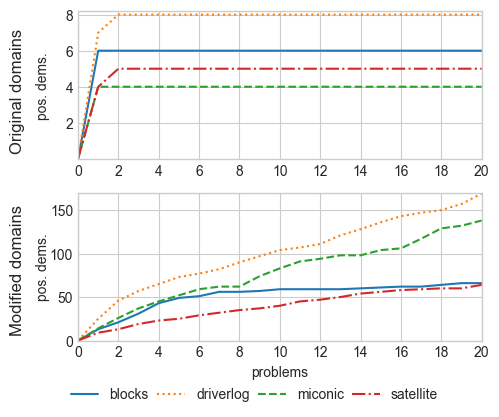

In [10]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 10

fig, axs = plt.subplots(2,1, figsize=(5,4))
plt.style.use("seaborn-v0_8-whitegrid")

alpha_v = 1

styles = ["solid", "dotted", "dashed", "dashdot"]
max_original = 0
max_extended = 0
for i in range(len(domains)):
    domain = domains[i]
    line_style = styles[i]

    plans, original_demonstrations, extended_demonstrations = parse_sample_analysis_data(domain)
    
    max_original = max(max_original, original_demonstrations[-1])
    max_extended = max(max_extended, extended_demonstrations[-1])

    axs[0].plot(plans, original_demonstrations, alpha=alpha_v, linestyle=line_style, label=domain)
    axs[1].plot(plans, extended_demonstrations, alpha=alpha_v, linestyle=line_style, label=domain)

axs[0].set_ylim([0,max_original+0.2])
axs[0].set_xlim([0,20])
axs[0].yaxis.set_ticks([2,4,6,8])
axs[0].xaxis.set_ticks([0,2,4,6,8,10,12,14,16,18,20])
axs[1].xaxis.set_ticks([0,2,4,6,8,10,12,14,16,18,20])

axs[1].set_ylim([0,int(max_extended+1)])
axs[1].set_xlim([0,20])


axs[0].set_title("Original domains", rotation='vertical',x=-0.15,y=0)
axs[0].set_ylabel("pos. dems.")
axs[0].yaxis.set_label_coords(-0.07,0.5)
axs[1].set_title("Modified domains", rotation='vertical',x=-0.15,y=0)
axs[1].set_ylabel("pos. dems.")
axs[1].yaxis.set_label_coords(-0.07,0.5)
axs[1].set_xlabel("problems")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5,-0.05), ncol=len(labels), columnspacing=0.6, bbox_transform=fig.transFigure)


fig.tight_layout()
plt.savefig("sample_analysis.pdf",bbox_inches='tight')
